In [28]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os

In [34]:
city_len = 1860

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
pop_path = f'{h08dir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5'
pop = np.fromfile(pop_path, dtype='float32').reshape(2160, 4320)
riv_path = f'{h08dir}/wsi/dat/riv_out_/W5E5LR__00000000.gl5'
rivout = np.fromfile(riv_path, dtype='float32').reshape(2160, 4320)
msk_dir = f'{h08dir}/global_city/dat/vld_cty_'
cnt_dir = f'{h08dir}/global_city/dat/cty_cnt_/gpw4'
prf_dir = f'{h08dir}/global_city/dat/cty_prf_'

lonlat_path = f'{h08dir}/global_city/dat/cty_lst_/gpw4/WUP2018_300k_2010.txt'
with open(lonlat_path, "r") as input_file:
    lines = input_file.readlines()

LPD = []

for i in range(city_len):
    city_num = i+1
    msk_path = f'{msk_dir}/city_{city_num:08}.gl5'
    prf_path = f'{prf_dir}/vld_cty_/city_{city_num:08}.gl5'
    
    if not os.path.exists(prf_path):
        print(f'{i+1} is invalid prf')
        
    else:
        msk = np.fromfile(msk_path, dtype='float32').reshape(2160, 4320)
        pop_msk = np.ma.masked_where(msk != 1, pop)
        pop_sum = np.sum(pop_msk)
        prf = np.fromfile(prf_path, dtype='float32').reshape(2160, 4320)
        supply = np.ma.masked_where(msk != 1, rivout)
        supply_sum = np.sum(supply) * 60 * 60 * 24
        
        line = lines[i]
        parts = line.split('\t')
        parts = [item.strip() for item in parts]
        cnt_lat = float(parts[1])
        cnt_lon = float(parts[2])
        city_name = parts[4].replace("\"", "").replace("?", "").replace("/", "")
        
        lpd = supply_sum/pop_sum
        LPD.append([cnt_lon, cnt_lat, lpd])
        
        print(city_num, lpd)

1 8588.732509266432
2 18908.299418612558
3 12513.683044681136
4 1392.8924279292896
5 4127.313488372093
6 15140.129431958683
7 14371.397635558036
8 8362.40897487281
9 802161.8199001929
10 1404.7401180381735
11 9296.58695115661
12 1957.5779216947753
13 30278.59631838872
14 824.1893354375848
15 303.4463867883518
16 1452.4843374321379
17 771.5007049013451
18 6320.548031479787
19 5046.001735456312
20 746954.5759399112
21 53526.50857869276
22 48372.94455322798
23 2750.3700803806105
24 347.7351411114233
25 2113.773927071302
26 47450.47643602748
27 837.443495900829
28 5539840.449568132
29 17617.717853437985
30 236.15750946332022
31 3595.786437418065
32 2700.1488328317464
33 43247.3774624846
34 6932.235752827967
35 157.05624355381173
36 348135.30842498346
37 518.2171528573747
38 9268.730601788782
39 4564.534267737949
40 1228.330911463758
41 627494.164465429
42 40910.00425291536
43 183.94253745546052
44 1403.898476197417
45 2299.5248294258968
46 13018.996029166065
47 6323.887844783886
48 1278013

In [40]:
lpd_array = np.array(LPD)
savepath = f'{h08dir}/wsi/dat/lpd/lpd.npy'
np.save(savepath, lpd_array)

In [48]:
tmp = np.load(savepath)
print(lpd_array[2].shape)

(3,)


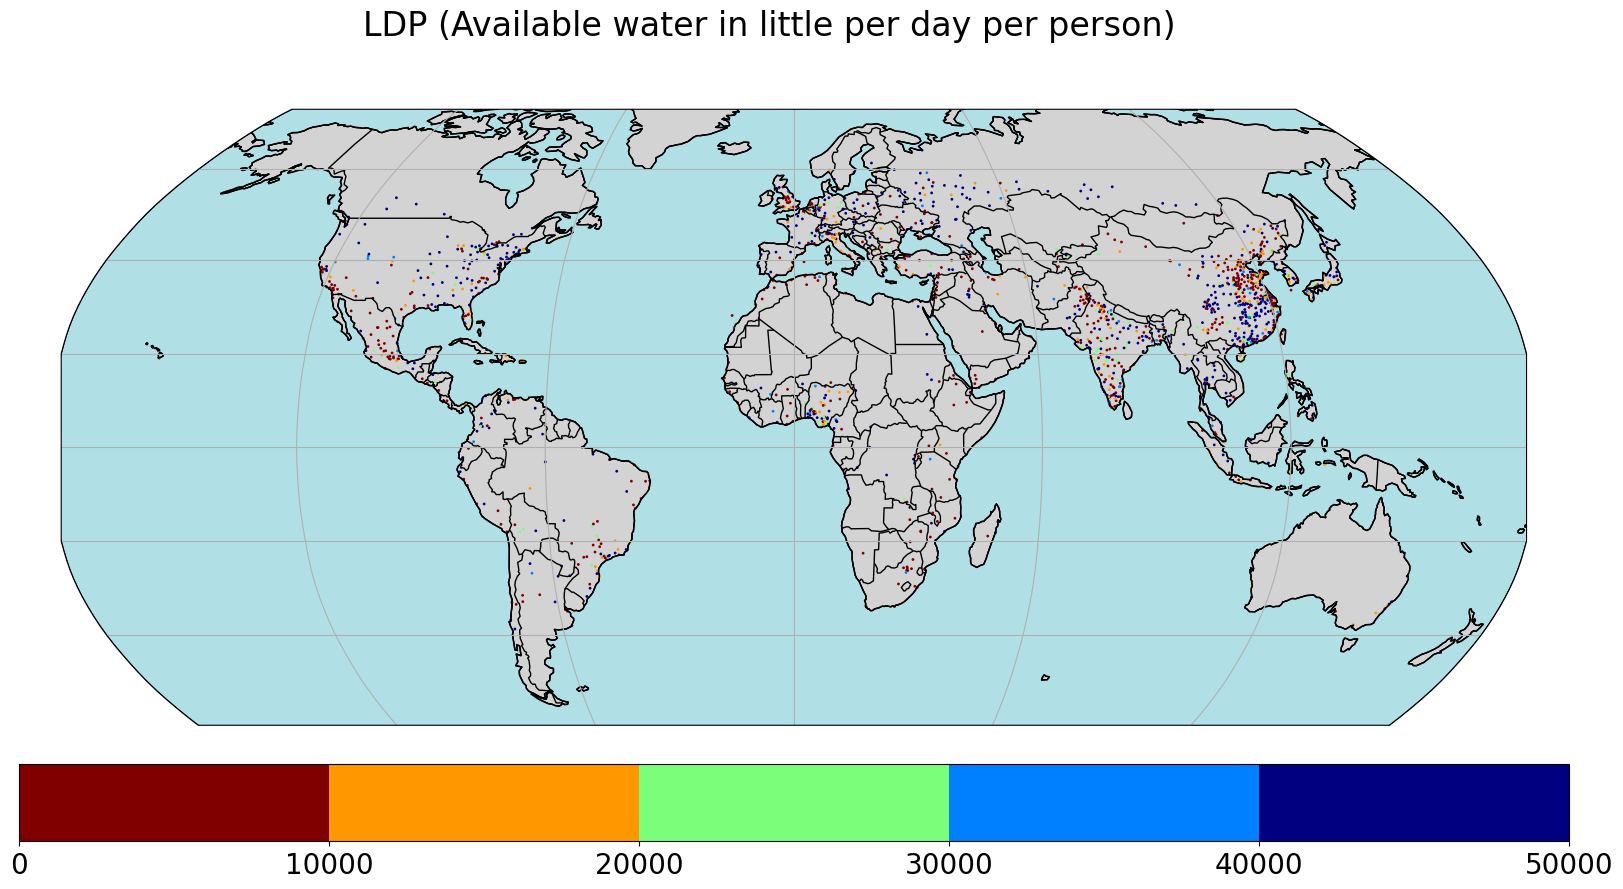

In [67]:
import matplotlib.colors as mcolors

cmap = plt.get_cmap('jet_r', 5)  # 10個の離散値
bounds = np.linspace(0, 5e4, 6)  # 0から100までの範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 20
projection = ccrs.Robinson(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([-180, 180, -60, 75], crs=crs)
img = ax.scatter(
              lpd_array[:, 0], 
              lpd_array[:, 1], 
              c=lpd_array[:, 2], 
              s=1, 
              cmap= cmap,
              norm = norm,
              transform=ccrs.PlateCarree(), 
             )
ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='powderblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad)
fig.suptitle('LDP (Available water in little per day per person)')
plt.show()

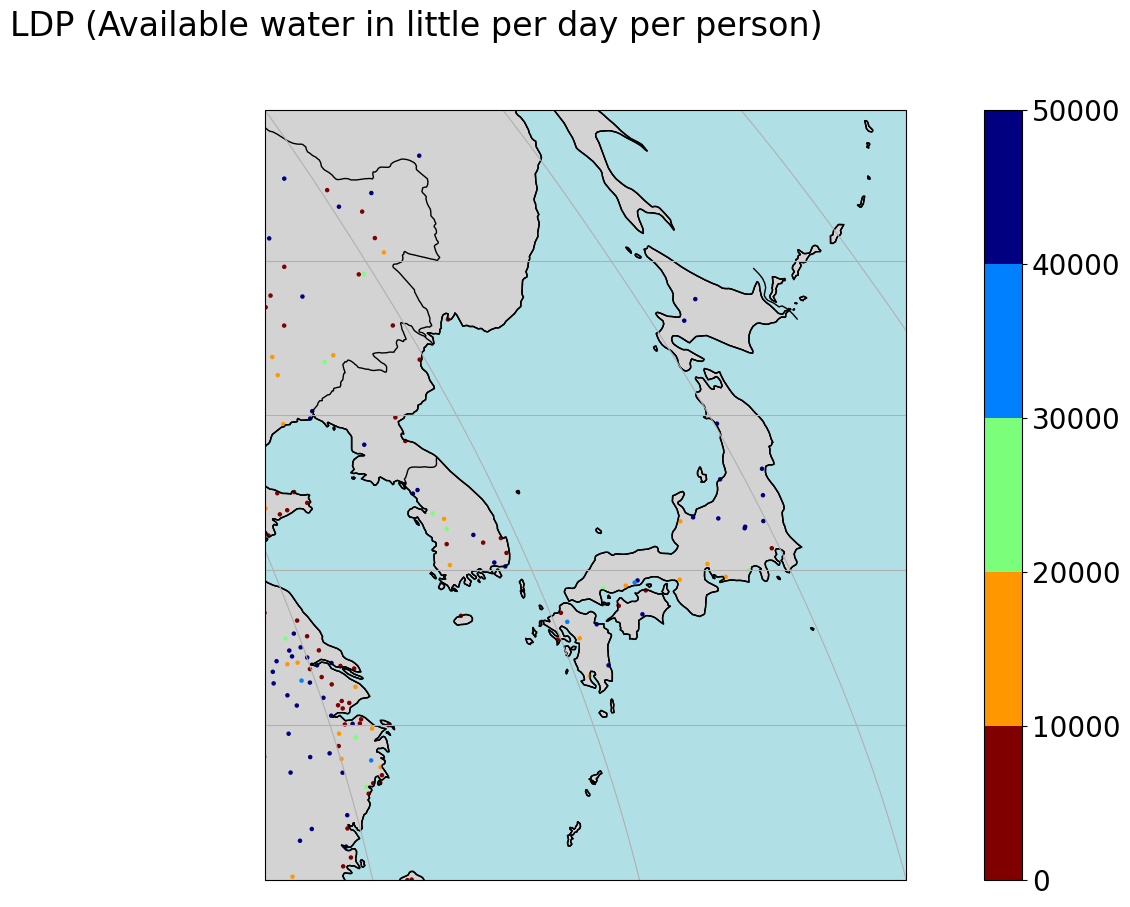

In [69]:
import matplotlib.colors as mcolors

cmap = plt.get_cmap('jet_r', 5)  # 10個の離散値
bounds = np.linspace(0, 5e4, 6)  # 0から100までの範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 20
projection = ccrs.Robinson(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([130, 140, 25, 50], crs=crs)
img = ax.scatter(
              lpd_array[:, 0], 
              lpd_array[:, 1], 
              c=lpd_array[:, 2], 
              s=5, 
              cmap= cmap,
              norm = norm,
              transform=ccrs.PlateCarree(), 
             )
ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='powderblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')
cbar = fig.colorbar(img, ax=ax, orientation='vertical', pad=0.05)
fig.suptitle('LDP (Available water in little per day per person)')
plt.show()

In [ ]:
"""
for i in range(city_len):
    city_num = i+1
    legend_labels = ['0 < LDP <=0.1', '0.1 < LDP <= 0.2', '0.2 < LDP <= 0.3', '0.3 < LDP <= 0.4', '0.4 < LDP']
    wsi_0 = False
    wsi_1 = False
    wsi_2 = False
    wsi_3 = False
    wsi_4 = True

for i in range(900):
    label_flag = False
    
    line = lines[i]
    line = line.strip()
    parts = line.split()
    lonmin = float(parts[6])
    lonmax = float(parts[7])
    latmin = float(parts[8])
    latmax = float(parts[9])
    
    loncnt = (lonmax - lonmin)/2 + lonmin
    latcnt = (latmax - latmin)/2 + latmin
    
    wsi = wsi_lst[i]
    if 0<wsi<=0.1:
        color = 'blue'
        if wsi_4 is True:
            label_index = 0
            label_flag = True
            wsi_4 = False
            wsi_0 = True
    elif 0.1<wsi<=0.2:
        color = 'cyan'
        if wsi_0 is True:
            label_index = 1
            label_flag = True
            wsi_0 = False
            wsi_1 = True
    elif 0.2<wsi<=0.3:
        color = 'limegreen'
        if wsi_1 is True:
            label_index = 2
            label_flag = True
            wsi_1 = False
            wsi_2 = True
    elif 0.3<wsi<=0.4:
        color = 'gold'
        if wsi_2 is True:
            label_index = 3
            label_flag = True
            wsi_2 = False
            wsi_3 = True
    elif 0.4<wsi:
        color = 'red'
        if wsi_3 is True:
            label_index = 4
            label_flag = True
            wsi_3 = False
    else:
        color = 'white'
        label_flag = False
        
    if label_flag is True:
        ax.plot(loncnt, latcnt, 'o', markersize=2, color=color, transform=ccrs.PlateCarree(), label=legend_labels[label_index])
    else:
        ax.plot(loncnt, latcnt, 'o', markersize=2, color=color, transform=ccrs.PlateCarree())
"""